## 1 주피터 노트북 사용법

### 가. 텍스트 (MarkDown) 셀 
* [마크다운 markdown 기본]
(https://gist.github.com/ihoneymon/652be052a0727ad59601/)
*[마크다운 기본 사용법 by Google] (https://colab.research.google.com/notebooks/markdown_guide.ipynb)

# H1  ''#''
## H2 ''##''
### H3 ''###''

> This is first blockqute.  ">"
>> This is second blockqute.  ">>"
* * *
### 숫자 목록

1.   첫째
2.   둘째

---
### 그림 문자 목록
*   1  "*"
  * 1-1 "   *"
* 2  "*"
  -  2-1 "  -"
    + 2-1-1 "    +"
    + 2-1-2 "    +"






### 나. 수식 편집하기

* [마크다운 markdown 수식 작성 참고](https://www.codecogs.com/latex/eqneditor.php)

>$
y = ax^2 + bx + c 
$

>$
x = \frac{-b \pm \sqrt{b^2 -4ac}}{2a}
$

>$
H(x) = Wx + b
$

>$ 
cost(W,b) = \frac{1}{m} \sum_{i=1}^m (H(x^{(i)} )-y^{(i)} )^2
$

### 다. 코딩 셀

In [0]:
a = 1
b = 2
c = a + b
print(c)

3


In [0]:
import tensorflow as tf
tf .__version__  # 버전 확인하기

'1.14.0-rc1'

In [0]:
# 지금 실행하지 마세요. 오류 발생 시!!!!
# 텐서플로우 기본 버전으로 돌아가기 위해 VM 재시작
!kill -9 -1

In [0]:
#사용 중인 GPU 확인하기
import tensorflow as tf
tf.test.gpu_device_name()

'/device:GPU:0'

## 2 TensorFlow 기초
* 참고1. [야메! 데이터분석](https://yamerong.tistory.com/37?category=690843)
* 참고2. [3분 딥러닝 텐서플로맛](https://github.com/golbin/TensorFlow-Tutorials/)
* 참고3. [텐서플로우 기초 정리](http://hero4earth.com/blog/learning/2018/01/15/tensor_flow_basics/)

### 가. 텐서플로우 소개



* 텐서플로우(Tensorflow)란 2015년 구글에서 인공지능을 파트인 구글브레인에서 개발하고  오픈소스 라이선스(Apache 2.0)로 공개
* Data flow graph를 기반으로하는 Numerical computation 소프트웨어 라이브러리
* 딥러닝을 염두하고 개발 됐기 때문에 딥 뉴럴 네트워크를 구현하고 관리하는데 굉장히 편하고 효율적
* 그래프 이론에 기초를 두어 각 노드들이 독립적인 관리가 가능하기 때문에 수정할 내용에 대해 해당 노드만 수정할 수 있어 쉬운 유지 관리와 구현이 가능
* 그래프 연산 방식을 갖기 때문에 GPU연산을 포함한 연산비용문제에서 효과적으로 컨트롤



### 나. 텐서플로우 프로그래밍 구조


>$  a=10 \\
 b=32 \\
 c=a+b \\
 print(c) $

In [0]:
# python으로 계산하기

a = 10
b = 32
c = a+b
print(c)

42


In [0]:
# tensorflow로 계산하기
import tensorflow as tf

a = tf.constant(10)
b = tf.constant(32)
c = tf.add(a, b)
print(c)

Tensor("Add_7:0", shape=(), dtype=int32)


In [0]:
sess = tf.Session()

print(sess.run(c))

42


#### <텐서플로우 연산 구조>
![텐서플로우 연산 구조](https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile3.uf.tistory.com%2Fimage%2F2613434B596DC6D825F9F0)


### 다. 그래프 vs 데이터 플로우

>
그래프 구조 | 데이터 플로우
--- | ---
![그래프구조](https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile29.uf.tistory.com%2Fimage%2F2256FA33596D8E70299A90) |![데이터플로우](https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile7.uf.tistory.com%2Fimage%2F24A52033596D9044368F9F)


* 엣지(Edge): 텐서를 의미하며  엣지의 방향은 텐서의 흐름

* 노드(Node): 곱하고, 나누는 등  텐서를 처리하는 연산 

#### <데이터 플로우 그래프 계산을 텐서플로우로 구현>
![대체 텍스트](https://img1.daumcdn.net/thumb/R720x0.q80/?scode=mtistory2&fname=http%3A%2F%2Fcfile6.uf.tistory.com%2Fimage%2F275DE533596D96ED2E9825)

In [0]:
# 텐서플로우로 그래프 플로우 계산
import tensorflow as tf
a = tf.constant(5, name='a')
b = tf.constant(3, name='b')
c = tf.multiply(a, b, name='c')
d = tf.add(a,b, name='d')
e = tf.add(c,d, name='e')
 
sess = tf.Session()
print(sess.run(e))

sess.close()

23


In [0]:
# 텐서플로우 그래프를 파일로 저장
import tensorflow as tf
a = tf.constant(5, name='a')
b = tf.constant(3, name='b')
c = tf.multiply(a, b, name='a_mul_b')
d = tf.add(a,b, name='d')
e = tf.add(c,d, name='e')
 
with tf.Session() as sess:
    sess.run(e)
    writer = tf.summary.FileWriter("./log", sess.graph)
    writer.close()


In [0]:
# 폴더 및 파일 삭제
!rm -f -r log

#### <Colab에서 TensorBoard 사용하기>
[Colab에서 TensorBoard 사용하기](https://www.dlology.com/blog/quick-guide-to-run-tensorboard-in-google-colab/)

#### (1) 외부 터널을 이용하는 방법

In [0]:
# Ngrok 실행 파일을 Colab 노트북에 직접 다운로드

!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
!unzip ngrok-stable-linux-amd64.zip

In [0]:
# 백그라운드에서 TensorBoard를 실행

LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
#  TensorBoard 포트 6006을 외부 세계로 터널로 돌림(백그라운드 실행)
get_ipython().system_raw('./ngrok http 6006 &')

# TUBORBoard 웹 페이지에 액세스 할 수있는 공개 URL 얻기
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    "import sys, json; print(json.load(sys.stdin)['tunnels'][0]['public_url'])"

https://efe2a691.ngrok.io


#### (2) 로컬 터널을 이용하는 방법

In [0]:
# 백그라운드에서 TensorBoard를 실행

LOG_DIR = './log'
get_ipython().system_raw(
    'tensorboard --logdir {} --host 0.0.0.0 --port 6006 &'
    .format(LOG_DIR)
)

In [0]:
# Install
!npm install -g localtunnel

# Tunnel port 6006 (TensorBoard assumed running)
get_ipython().system_raw('lt --port 6006 >> url.txt 2>&1 &')

# Get url
!cat url.txt

/tools/node/bin/lt -> /tools/node/lib/node_modules/localtunnel/bin/client
+ localtunnel@1.9.2
updated 1 package in 1.962s
your url is: https://fluffy-crab-2.localtunnel.me
your url is: https://ugly-eagle-4.localtunnel.me
your url is: https://clever-impala-2.localtunnel.me


### 라. 텐서플로우 자료구조


#### (1) 텐서(Tensor)란?

![대체 텍스트](https://upload.wikimedia.org/wikipedia/commons/thumb/d/d5/Stress_in_a_continuum.svg/450px-Stress_in_a_continuum.svg.png)

* 자연계의 물리현상을 설명하기 위한 자료구조
* 자연 현상을 수치화한 시간과 공간의 관계로 설명하기 위하여 도입한 개념
* 다차원 배열 구조의 자료



#### (2) 텐서의 세 가지 특성
* **랭크(Rank) - 차원** \\
텐서는 다차원 배열이다. 여기에서 ‘차원’이 바로 ‘랭크’와 같은 의미이다.
 * 랭크0 텐서 : 스칼라(단순한 크기)
 * 랭크1 텐서 : 벡터(크기와 방향, 1차원 배열)
 * 랭크2 텐서 : 배열(데이터 표, 2차원 배열)
 * 랭크3 텐서 : 큐브(데이터 큐브, 3차원 배열)
 ![대체 텍스트](https://cdn-images-1.medium.com/freeze/max/1000/1*XIOuiEjfXAXOFa0-w2_pTw.jpeg?q=20)

* **모양(Shape)** \\
  * 각 차원이 몇 개의 요소(Element)들로 구성되었는지를 나타내는 값  
![대체 텍스트](https://2.bp.blogspot.com/-rB26puCWMNc/WHCymlm0F5I/AAAAAAAAAfI/0J_xsa_hcjY9H19xOdJFUycwm0aJpQ7ZgCLcB/s1600/%25EC%258A%25A4%25ED%2581%25AC%25EB%25A6%25B0%25EC%2583%25B7%252C%2B2017-01-07%2B18-16-43.png)  

* **데이터 타입(Type)** \\
 * 텐서 값의 자료형을 의미
![대체 텍스트](https://miro.medium.com/max/700/1*WBopnJ1NgGbsatnFuUrNow.png)



#### (3) 세 가지 자료형
* tf.constant : 변하지 않는 수를 지정하는 자료형 [상수]
* tf.placeholder : 먼저 만들고 나중에 값을 제공 [특성계수]
* tf.Variable : 조건에 따라 값을계속 바꾸는 경우에 사용 [특성]

예) 선형 회귀 H(x)

>$ 
H(x)=Wx+b 
$

 - 특성 계수 W : 값을 계속 바꾸어야 한다  ~~ **Variable** 
 - 특성 x : 입력값이 제공된다 ~~ **placeholder**
 - 상수 b : 변하지 않는 값 ~~ **constant**
  

In [0]:
# constant
import tensorflow as tf

a = tf.constant(10)                       #int32
b = tf.constant(3.14, name = 'b')         #float32
c = tf.add(tf.cast(a, tf.float32), b)     #add 연산, 캐스팅
txt = tf.constant("Hello~")               #string
d = tf.constant([1, 2, 3, 4])             #1-D Tensor
e = tf.constant([[1, 2, 3],               #2-D Tensor
                 [4, 5, 6],
                 [7, 8, 9]])
f = tf.constant(-1.0, shape=[2, 3])       #2-D Tensor, 자동 채움
t = tf.constant([[[1, 1, 1], [2, 2, 2]],  #3-D Tensor
                 [[3, 3, 3], [4, 4, 4]]])
print(a, b, c, d, e)

sess = tf.Session()

print(sess.run(txt))
print(sess.run(c))
print(sess.run(d))
print(d.shape)
print(sess.run(e))
print(e.shape)
print(sess.run(f))
print(f.shape)
print(sess.run(t))
print(t.shape)

sess.close()

In [0]:
# tf.placeholder (1)
import tensorflow as tf

ph1 = tf.placeholder(dtype=tf.float32)
ph2 = tf.placeholder(tf.float32)
ph3 = tf.placeholder(tf.float32)
 
val = ph1 * ph2 + ph3

sess = tf.Session()

result = sess.run(val, feed_dict = {ph1: 2, ph2: 3, ph3:4})
#result = sess.run(val, feed_dict = {ph1: [2, 3], ph2: [3, 4], ph3:[4, 5]}) 
print(result)

sess.close()

10.0


In [0]:
# tf.placeholder (2)
import tensorflow as tf

x_data = [1, 2, 3, 5]
y_data = [1, 1, 3, 4]
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)
val = tf.equal(X,Y)

sess = tf.Session()

result = sess.run(val, feed_dict={X: x_data, Y: y_data})
print(result)

sess.close()


[ True False  True False]


In [0]:
# tf.Variable (1)
# 상수나 랜덤값으로 초기화

import tensorflow as tf
#tf.set_random_seed(777)  # for reproducibility

X = tf.Variable(1.)
Y = tf.Variable(tf.random_normal([1]))

Z = X * Y

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print(sess.run(Z))
 
sess.close()

[0.5442759]


In [0]:
# tf.Variable
# 상수나 랜덤값으로 초기화

import tensorflow as tf
#tf.set_random_seed(777)  # for reproducibility

L = tf.Variable(1.)
M = tf.Variable(tf.random_normal([1]))

Z = L * M

sess = tf.Session()
sess.run(tf.global_variables_initializer())

print(sess.run(Z))
 
sess.close()

[-0.37245107]


## 3 선형 회귀

참고1 [김성훈 교수 Lab2](https://pythonkim.tistory.com/9?category=573319)


### 가. 선형 회귀 복습
가설(Hypothesis) 과 비용 함수(cost function)

>$H(x) = Wx + b$

>$cost(W,b) = \frac{1}{m} \sum_{i=1}^m (H(x^{(i)} )-y^{(i)} )^2 $



가설|비용 함수
--- | ---
![가설](https://t1.daumcdn.net/cfile/tistory/2669EA3E5790FD3317) |![비용함수](https://t1.daumcdn.net/cfile/tistory/26447E3E5790FD352E)




### 나. 선형회귀 구현

####  (1) 단순 선형 회귀

* W에 따른 Cost 변화

>$
y = ax + b
$

\begin{equation*}
\begin{split} 
H(x) &= Wx \\

cost(W) &= \frac{1}{2m} \sum_{i=1}^m (H(x^{(i)} )-y^{(i)} )^2 \\
&= \frac{1}{2m} \sum_{i=1}^m (Wx^{(i)}-y^{(i)} )^2 \\

W &:= W - \alpha \frac{\partial }{\partial W}cost(W)

\end{split}
\end{equation*}

$$
H(x) = Wx \\

cost(W) = \frac{1}{2m} \sum_{i=1}^m (H(x^{(i)} )-y^{(i)} )^2 \\
= \frac{1}{2m} \sum_{i=1}^m (Wx^{(i)}-y^{(i)} )^2 \\

W := W - \alpha \frac{\partial }{\partial W}cost(W)

$$

 * 특성 계수(W) 에 따른 비용(Cost) 변화 그래프
 
   * 참고 사이트:  
     - [김성훈 교수 Lab03 웹](https://pythonkim.tistory.com/11?category=573319)
     - [김성훈 교수 lab03 동영상](https://www.youtube.com/watch?v=Y0EF9VqRuEA&feature=youtu.be)

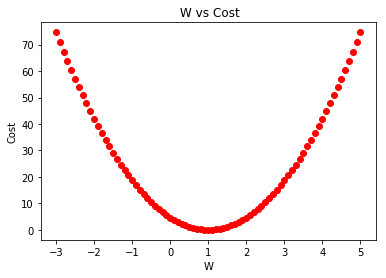

In [0]:
# W에 따른 비용함수 그래프 그리기
import tensorflow as tf
import matplotlib.pyplot as plt

X = [1, 2, 3]
Y = [1, 2, 3]

W = tf.placeholder(tf.float32)

# 가설 함수 H(x) = Wx
hypothesis = W * X

# 비용 함수
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# 세션
sess = tf.Session()

# 전역 변수 초기화
sess.run(tf.global_variables_initializer())

# 비용 함수 그리기용 변수
W_val = []
cost_val = []

for i in range(-30, 51):
  feed_W = i* 0.1
  curr_cost, curr_W = sess.run([cost, W], feed_dict={W: feed_W})
  W_val.append(curr_W)
  cost_val.append(curr_cost)

sess.close()


# 비용함수 그리기
plt.plot(W_val, cost_val, 'ro')  # 'ro' ~ 빨강, 원형표식, 선없음 
plt.title(" W vs Cost")
plt.xlabel("W")
plt.ylabel("Cost")
plt.show()



* 경사하강법

\begin{equation*}
\begin{split} 
H(x) &= Wx \\

cost(W) &= \frac{1}{2m} \sum_{i=1}^m (H(x^{(i)} )-y^{(i)} )^2 \\
&= \frac{1}{2m} \sum_{i=1}^m (Wx^{(i)}-y^{(i)} )^2 \\

W &:= W - \alpha \frac{\partial }{\partial W}cost(W) \\
&= W -  \alpha \frac{\partial }{\partial W} \left( \frac{1}{2m} \sum_{i=1}^m (Wx^{(i)}-y^{(i)} )^2 \right) \\
&= W -  \alpha \left( \frac{1}{m} (Wx - y)\cdot x \right)
\end{split}
\end{equation*}

In [0]:
#경사하강법 수동 계산
import tensorflow as tf
x_data = [1,2,3]
y_data = [1,2,3]

W = tf.Variable(tf.random_normal([1]), name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

#가설 함수
hypothesis = X * W

#비용 함수
cost = tf.reduce_sum(tf.square(hypothesis - Y))

#경사 하강법 적용
learning_rate = 0.1
gradient = tf.reduce_mean(( W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)             # 새로 계산한 값을 할당

# 그래프 세션
sess = tf.Session()

#전역변수 초기화
sess.run(tf.global_variables_initializer())

print("step".rjust(6), "cost".center(10), "W".center(10))

#훈련하기
for step in range(21):
  sess.run(update, feed_dict={X: x_data, Y: y_data})
  W_val = sess.run(W)
  cost_val = sess.run(cost, feed_dict = {X: x_data, Y:y_data})
  print("%6s %10.7f %10.7f" %(step, cost_val, W_val))


sess.close()

In [0]:
#경사하강법 수동 계산 + 그래프로 확인
import tensorflow as tf
from matplotlib import pyplot as plt

x_data = [1,2,3]
y_data = [1,2,3]

#W = tf.Variable(tf.random_normal([1]), name='weight')
W = tf.Variable(5.0, name='weight')
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

#가설 함수
hypothesis = X * W

#비용 함수
cost = tf.reduce_sum(tf.square(hypothesis - Y))

#경사 하강법 적용
learning_rate = 0.5
gradient = tf.reduce_mean(( W * X - Y) * X)
descent = W - learning_rate * gradient
update = W.assign(descent)             # 새로 계산한 값을 할당

# 그래프 세션
sess = tf.Session()

#전역변수 초기화
sess.run(tf.global_variables_initializer())

#print("step".rjust(6), "cost".center(10), "W".center(10))

# 비용 함수 그리기용 변수
X_val = []  # W
Y_val = []  # cost

#훈련하기
for step in range(10):
  sess.run(update, feed_dict={X: x_data, Y: y_data})
  W_val = sess.run(W)
  cost_val = sess.run(cost, feed_dict = {X: x_data, Y:y_data})
  X_val.append(W_val)
  Y_val.append(cost_val)
  print("%6s %10.7f %10.7f" %(step, cost_val, W_val))

sess.close()


# 비용함수 그리기
plt.plot(X_val, Y_val,'ro-')  # 'ro' ~ 빨강, 원형표식, 선없음 
plt.title(" W vs Cost")
plt.xlabel("W")
plt.ylabel("Cost")
plt.show()


* 텐서플로 제공 함수 이용 (입력 변수 고정)

In [0]:
import tensorflow as tf

#훈련 데이터
x_train = [1,2,3]
y_train = [1,2,3]

# H(x) = Wx + b , 임의의 W,b 값 취하기
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

#가설 함수 H = Wx + b
hypothesis = x_train * W + b

#비용 함수
# reduce_mean 은 평균 함수
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

#비용 함수 최소화 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
#--------------------------------------#
train = optimizer.minimize(cost)
#--------------------------------------#

#실행 준비
sess = tf.Session()
#그래프 전역 변수 초기화
#텐서플로우 변수를 사용하기 전에는 초기화 해야함
sess.run(tf.global_variables_initializer())

# 훈련하기
for step in range(2001):
  sess.run(train)
  if step % 20 == 0:
    print(step, sess.run(cost), sess.run(W), sess.run(b))
   
sess.close()  

In [0]:
#출력을 보기좋게 정렬
import tensorflow as tf

#훈련 데이터
x_train = [1,2,3]
y_train = [1,2,3]

# H(x) = Wx + b , 임의의 W,b 값 취하기
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

#가설 함수 h
hypothesis = x_train * W + b

#비용 함수
# reduce_mean 은 평균 함수
cost = tf.reduce_mean(tf.square(hypothesis - y_train))

#비용 함수 최소화 경사하강법
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

#실행 준비
sess = tf.Session()
#그래프 전역 변수 초기화
#텐서플로우 변수를 사용하기 전에는 초기화 해야함
sess.run(tf.global_variables_initializer())

strFormat = "%6s %10.7f %10.7f %10.7f"
stuOut = "%6s %10s %10s %10s" % ("step", "cost", "W", "b")
print(stuOut)

# 훈련하기
for step in range(2001):
  sess.run(train)
  if step % 20 == 0:
    stuOut = strFormat % (step, sess.run(cost), sess.run(W), sess.run(b))
    print(stuOut)

print()    
    
    
sess.close()  

* * 텐서플로 제공 함수 이용 (입력 변수 가변)

In [0]:
# placeholder 이용
import tensorflow as tf

#훈련 데이터
X = tf.placeholder(tf.float32, shape=[None])
Y = tf.placeholder(tf.float32, shape=[None])

# H(x) = Wx + b , 임의의 W,b 값 취하기
W = tf.Variable(tf.random_normal([1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

#가설 함수
hypothesis = X * W + b

#비용 함수
#reduce_mean 은 평균 함수
cost = tf.reduce_mean(tf.square(hypothesis - Y))

#비용 함수 최소화
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(cost)

#실행 준비
sess = tf.Session()
#그래프 전역 변수 초기화
#텐서플로우 변수를 사용하기 전에는 초기화 해야함
sess.run(tf.global_variables_initializer())

strFormat = "%6s %10.7f %10.7f %10.7f"
stuOut = "%6s %10s %10s %10s" % ("step", "cost", "W", "b")
print(stuOut)

# 훈련하기
for step in range(2001):
  cost_val, W_val, b_val, _ = sess.run([cost, W, b, train],
                                       feed_dict = {X:[1, 2, 3, 4, 5],
                                                    Y:[2.1, 3.1, 4.1, 5.1, 6.1]})
  if step % 100 == 0:
    stuOut = strFormat % (step, cost_val, W_val, b_val)
    print(stuOut)
    
# 테스트 데이터로 모델 평가
print(sess.run(hypothesis, feed_dict={X:[5]}))
print(sess.run(hypothesis, feed_dict={X:[2.5]}))
print(sess.run(hypothesis, feed_dict={X:[1.5, 3.5]}))

sess.close()

#### (2) 다중 선형 회귀

>$
H(x_1 , x_2 , x_3 ) = x_1 w_1 + x_2 w_2 + x_3 w_3 
$

>$
\begin{bmatrix}
x_1 ^{(1)} \ x_2 ^{(1)} \ x_3 ^{(1)}\\ 
x_1 ^{(2)} \ x_2 ^{(2)} \ x_3 ^{(2)}\\
x_1 ^{(3)} \ x_2 ^{(3)} \ x_3 ^{(3)}\\
 \ \vdots \\
x_1 ^{(m)} \ x_2 ^{(m)} \ x_3 ^{(m)}    
\end{bmatrix}
\begin{bmatrix}
w_1 ^{(1)} \ w_1 ^{(2)} \ w_1 ^{(3)} \ \cdots \ w_1 ^{(m)}   \\ 
w_2 ^{(1)} \ w_2 ^{(2)} \ w_2 ^{(3)} \ \cdots \ w_2 ^{(m)}   \\ 
w_3 ^{(1)} \ w_3 ^{(2)} \ w_3 ^{(3)} \ \cdots \ w_3 ^{(m)}   \\    
\end{bmatrix}
$


$$ 
y = ax + b
$$ 

* 내부 제공 데이터 이용

In [0]:
# 다중 선형 회귀 Multi-variable linear regression
import tensorflow as tf

tf.set_random_seed(777)  # for reproducibility

x_data = [[73., 80., 75. ],  # x(1)
          [93., 88., 93. ],  # x(2)
          [89., 91., 90. ],  # x(3)
          [96., 98., 100.],  # x(4)
          [73., 66., 70. ]]  # x(5)

y_data = [[152.],            # y(1)
          [185.],            # y(2)
          [180.],            # y(3)
          [196.],            # y(4)
          [142.]]            # y(5)


# placeholders for a tensor that will be always fed.
#훈련 데이터 갯수는 변경 고려하여 None으로...
X = tf.placeholder(tf.float32, shape=[None, 3])  
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(201):
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
      #W_val = ":".join(sess.run(W))
      print(step, "Cost: ", cost_val, "W:",sess.run(W),"\nPrediction:\n", hy_val)


      # Ask my score
print("Your score will be ", sess.run(hypothesis, 
                                      feed_dict={X: [[100, 70, 99]]}))

print("Other scores will be ", sess.run(hypothesis,
                                        feed_dict={X: [[60, 70, 55], [90, 100, 80]]}))

sess.close()


* colab에 파일을 업로드하고 데이터를 가져와서 훈련

In [0]:
# Lab 4 Multi-variable linear regression
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

xy = np.loadtxt('data-01-test-score.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]   # X: 마지막 열 제외한 모든 열 저장
y_data = xy[:, [-1]]   # Y: 마지막 열만 저장

# 훈련 전 데이터가 정확한지 반드시 확인
print(x_data, "\nx_data shape:", x_data.shape)  # X: (25,3)
print(y_data, "\ny_data shape:", y_data.shape)  # Y: (25,1)

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3]) # 입력 특성 3개
Y = tf.placeholder(tf.float32, shape=[None, 1]) # 출력값 1개

W = tf.Variable(tf.random_normal([3, 1]), name='weight')  # W: (3 x1)
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b   # H = XW + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

for step in range(2001):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], 
                                   feed_dict={X: x_data, Y: y_data})
    if step % 100 == 0:
        #print(step, "Cost:", cost_val, "\nPrediction:\n", hy_val)
        print(step, "Cost:", cost_val)

        
# Ask my score
print("Your score will be ", sess.run(hypothesis, 
                                      feed_dict={X: [[100, 70, 99]]}))

print("Other scores will be ", sess.run(hypothesis,
                                        feed_dict={X: [[60, 70, 55], [90, 100, 80]]}))


sess.close()


In [0]:
# Portland_Housing_price [Multi-variable linear regression]
# m=47   features: x1, x2    y
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

xy = np.loadtxt('Portland_Housing_price.csv', delimiter=',', dtype=np.float32)
x_raw = xy[:, 0:-1]   # X: 마지막 열 제외한 모든 열 저장
y_data = xy[:, [-1]]   # Y: 마지막 열만 저장


train_no = x_raw.shape[0]   # 훈련 데이터 갯수
feature_no = x_raw.shape[1] # features 갯수 

#입력값 정규화 (x-mean)/std
Mean = np.mean(x_raw, axis=0)
Std = np.std(x_raw, axis=0, ddof=1)    #ddof= 0 모집단 , 1 표본집단
x_data = (x_raw - Mean) / Std


# 훈련 전 데이터가 정확한지 반드시 확인(데이터는 세 줄 정도만 확인)
print(x_data[0:5, :], "\nx_data shape:", x_data.shape)  # X: (47,2)
print(y_data[0:5, :], "\ny_data shape:", y_data.shape)  # Y: (47,1)

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, feature_no]) # 입력 특성 2개
Y = tf.placeholder(tf.float32, shape=[None, 1]) # 출력값 1개

W = tf.Variable(tf.random_normal([feature_no, 1]), name='weight')  # W: (2 x1)
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b   # H = XW + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.03)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()
# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())


print("Step".rjust(6),"Cost".center(16))
for step in range(401):
    cost_val, hy_val, _ = sess.run([cost, hypothesis, train], 
                                   feed_dict={X: x_data, Y: y_data})
    if step % 10 == 0:
        #print(step, "Cost:", cost_val, "\nPrediction:\n", hy_val)
        print("%6d %16.2f" %(step, cost_val))

        
# Ask my score
test_data = [1650, 3]
test_data = (test_data - Mean) / Std

print("Your price will be ", sess.run(hypothesis, 
                                      feed_dict={X: [test_data]}))


sess.close()


In [0]:
# Portland_Housing_price [Multi-variable linear regression]
# m=47   features: x1, x2    y
import tensorflow as tf
import numpy as np

tf.set_random_seed(777)  # for reproducibility

xy = np.loadtxt('Portland_Housing_price.csv', delimiter=',', dtype=np.float32)
x_raw = xy[:, 0:-1]   # X: 마지막 열 제외한 모든 열 저장
y_data = xy[:, [-1]]   # Y: 마지막 열만 저장

train_no = x_raw.shape[0]   # 훈련 데이터 갯수
feature_no = x_raw.shape[1] # features 갯수 

#입력값 정규화 (x-mean)/sigma
#x_data = np.zeros((train_no,feature_no))
#x_raw = x_raw - np.mean(x_raw, axis=0)  #행방향 평균 빼기
#x_data = x_raw/np.std(x_raw, axis=0)    #행방향 표준편차 나누기

#입력값 정규화 (x-mean)/std
Mean = np.mean(x_raw, axis=0)
Std = np.std(x_raw, axis=0, ddof=1)    #ddof= 0 모집단 , 1 표본집단
print(Mean, Std)
x_data = (x_raw - Mean) / Std


# 훈련 전 데이터가 정확한지 반드시 확인(5줄 정도만)
print(x_data[0:5, :], "\nx_data shape:", x_data.shape)  # X: (47,2)
print(y_data[0:5, :], "\ny_data shape:", y_data.shape)  # Y: (47,1)
#print(x_data, "\nx_data shape:", x_data.shape)  # X: (47,2)
#print(y_data, "\ny_data shape:", y_data.shape)  # Y: (47,1)


[2000.6809       3.1702127] [7.9470233e+02 7.6098198e-01]
[[ 0.1300098  -0.22367513]
 [-0.5041899  -0.22367513]
 [ 0.50247633 -0.22367513]
 [-0.73572314 -1.5377667 ]
 [ 1.257476    1.0904164 ]] 
x_data shape: (47, 2)
[[399900.]
 [329900.]
 [369000.]
 [232000.]
 [539900.]] 
y_data shape: (47, 1)


*[참고]  numPy 배열 슬라이싱 테스트 \\
 *array[행start :행 end : 행step , 열start :열 end : 열step]

In [0]:
import numpy as np
x = np.array([[1, 12, 13, 14],
              [2,  5,  6, 30],
              [3,  8,  9, 40],
              [4, 11, 12, 50],
              [5, 66, 77, 90],])

#print(x)
#print(x[::2])     # 2행 간격으로 1,3,5(0,2,4)행 선택
#print(x[:3:])     # 1~3(0,1,2)행 선택
#print(x[:,:2:])   # 1~2(0,1)열 선택

print(x[0:-1 , :])     # 마지막 행 제외하고 선택
print(x[: , 0:-1])     # 마지막 열 제외하고 선택
print(x[[-1],:  ])     # 마지막 행만 선택
print(x[: , [-1]])     # 마지막 열만 선택  
#1,2,4행의 2,4열 데이터 추출
print(x[[[0],[1],[3]] , [1,3]])

* 대량의 데이터 처리: Queue Runners
 * (1) 입력 파일 리스트 만들기
 * (2) 파일 리더를 정의하고 읽기
 * (3) 읽은 값을 파싱하여 저장

* 실습에 사용할 파일
  *   data-01-test-score1.csv
  *   data-01-test-score2.csv
  *   data-01-test-score3.csv
  *   data-01-test-score4.csv

In [0]:
# Lab 4 Multi-variable linear regression
# https://www.tensorflow.org/programmers_guide/reading_data

import tensorflow as tf
tf.set_random_seed(777)  # for reproducibility

# (1)입력 파일 리스트 만들기
filename_queue = tf.train.string_input_producer(
    ['data-01-test-score1.csv',
     'data-01-test-score2.csv',
     'data-01-test-score3.csv',
     'data-01-test-score4.csv'], shuffle=False, name='filename_queue')

# (2) 파일 리더를 정의하고 읽기
reader = tf.TextLineReader()
key, value = reader.read(filename_queue)

# Default values, in case of empty columns. Also specifies the type of the
# decoded result.
record_defaults = [[0.], [0.], [0.], [0.]]
xy = tf.decode_csv(value, record_defaults=record_defaults)

# (3) csv 파일에서 10개씩 읽어서 파싱하여 저장(batch job)
train_x_batch, train_y_batch = \
    tf.train.batch([xy[0:-1], xy[-1:]], batch_size=10)

# placeholders for a tensor that will be always fed.
X = tf.placeholder(tf.float32, shape=[None, 3])
Y = tf.placeholder(tf.float32, shape=[None, 1])

W = tf.Variable(tf.random_normal([3, 1]), name='weight')
b = tf.Variable(tf.random_normal([1]), name='bias')

# Hypothesis
hypothesis = tf.matmul(X, W) + b

# Simplified cost/loss function
cost = tf.reduce_mean(tf.square(hypothesis - Y))

# Minimize
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-5)
train = optimizer.minimize(cost)

# Launch the graph in a session.
sess = tf.Session()

# Initializes global variables in the graph.
sess.run(tf.global_variables_initializer())

# Start populating the filename queue.
coord = tf.train.Coordinator()
threads = tf.train.start_queue_runners(sess=sess, coord=coord)

for step in range(4001):
    x_batch, y_batch = sess.run([train_x_batch, train_y_batch])
    cost_val, hy_val, _ = sess.run(
        [cost, hypothesis, train], feed_dict={X: x_batch, Y: y_batch})
    if step % 100 == 0:
        print(step, "Cost: ", cost_val, "\nPrediction:\n", hy_val)
        #print(step, "Cost: ")

coord.request_stop()
coord.join(threads)

# Ask my score
print("Your score will be ",
      sess.run(hypothesis, feed_dict={X: [[100, 90, 100]]}))

print("Other scores will be ",
      sess.run(hypothesis, feed_dict={X: [[0, 0, 0], [100, 100, 100], [50, 50, 50]]}))


sess.close()

In [27]:
import tensorflow as tf
tf.__version__

'1.14.0'